In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


What diagnosis is being diagnosed/treated the most for Medicare patients?
Diagnosis of sepsis, joint replacement and heart failure are common among patients using Medicare as a payer. Less common diagnosis included multiple labor and delivery diagnosis. Considering that eligibile Medicare recipients include older adults (65+) and disabled individuals these observations were expected. 

Less expected was the variation in Medicare payments for the same diagnosis across states. It is clear that more poplulated states have a higher number of Medicare discharges, but we also see that the Medicare plans in some of these states cover the least of the total charges. 

In [2]:
# read the data files
state_df = pd.read_csv("Resources/2016_statedata.csv")
national_df = pd.read_csv("Resources/2016_nationaldata.csv")

state_df.head()

,DRG Definition,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL,14,"$962,498.36","$284,914.79","$148,511.00"
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CO,17,"$1,153,214.53","$263,056.94","$204,396.41"
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,IA,17,"$758,456.82","$205,891.47","$201,847.06"
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,MD,20,"$335,844.25","$309,431.50","$306,840.80"
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,OR,20,"$510,127.25","$252,960.50","$241,896.90"


In [3]:
national_df.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,2157,959185.35,256985.62,223531.81
1,002 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,289,595866.04,148455.34,129841.52
2,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,17886,559609.30,139934.52,125777.36
3,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",14451,323082.29,78585.80,71097.79
4,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,1218,548434.68,125118.18,100461.79


In [4]:
# covert values from string to int/float so that we can use it for calculations
# remove characters "$" and commas ","

state_df[" Total Discharges "] = state_df[" Total Discharges "].str.replace("," , "")
state_df["Average Covered Charges"] = state_df["Average Covered Charges"].str.replace("," , "").str.replace("$" , "")
state_df["Average Total Payments"] = state_df["Average Total Payments"].str.replace("," , "").str.replace("$" , "")
state_df["Average Medicare Payments"] = state_df["Average Medicare Payments"].str.replace("," , "").str.replace("$" , "")

# with characters removed, covert to float
state_df["Average Covered Charges"] = pd.to_numeric(state_df["Average Covered Charges"])
state_df["Average Total Payments"] = pd.to_numeric(state_df["Average Total Payments"])
state_df["Average Medicare Payments"] = pd.to_numeric(state_df["Average Medicare Payments"])
state_df[" Total Discharges "] = pd.to_numeric(state_df[" Total Discharges "])

#state_df.head()

In [5]:
# calculate other helpful values like what is actually being paid in comparison to the cost
percent_actually_paid = (state_df["Average Covered Charges"] - state_df["Average Total Payments"]) / state_df["Average Covered Charges"]

percent_covered_by_medicare = state_df["Average Medicare Payments"] / state_df["Average Covered Charges"]

state_df_wpaid = state_df

# add these new columns to the dataframe
state_df_wpaid["Percent Actually Paid"] = percent_actually_paid
state_df_wpaid["Percent Covered by Medicare"] = percent_covered_by_medicare

state_df_wpaid.to_csv("Output/state_data_all.csv") # save as csv file with additonal columns 

state_df_wpaid.head()



,DRG Definition,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Percent Actually Paid,Percent Covered by Medicare
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL,14,962498.36,284914.79,148511.00,0.703984,0.154297
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CO,17,1153214.53,263056.94,204396.41,0.771892,0.177241
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,IA,17,758456.82,205891.47,201847.06,0.728539,0.266129
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,MD,20,335844.25,309431.50,306840.80,0.078646,0.913640
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,OR,20,510127.25,252960.50,241896.90,0.504123,0.474189


#### Diagnoses with Top Discharges

In [6]:
# sort national data set to see which diagnosis have the most discharges
most_discharges = national_df.sort_values(by = " Total Discharges ", ascending = False)

most_discharges.to_csv("Output/diag_top_discharges.csv") # save sorted data as csv

most_discharges.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
675,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,539520,56214.94,13321.46,11632.11
374,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,502566,59206.64,14710.07,11837.10
234,291 - HEART FAILURE & SHOCK W MCC,235068,44357.68,10772.85,9403.94
235,292 - HEART FAILURE & SHOCK W CC,183732,29155.23,7344.20,6026.42
317,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",169816,26532.69,5831.99,4358.98


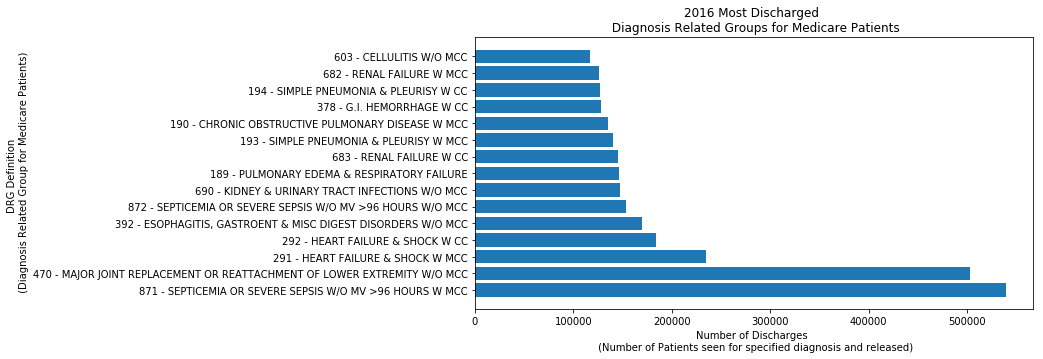

In [30]:
# plot top 15 diagnosis according to discharge rate
plt.figure(figsize = (10, 5))
plt.barh(most_discharges["DRG Definition"].head(15), most_discharges[" Total Discharges "].head(15));

# add labels
plt.xlabel("Number of Discharges \n (Number of Patients seen for specified diagnosis and released)")
plt.ylabel("DRG Definition \n (Diagnosis Related Group for Medicare Patients)")

plt.title("2016 Most Discharged \n Diagnosis Related Groups for Medicare Patients")

plt.savefig("Output/Images/top_discharges.png") # save image

#### Diagnoses with Least Number of Discharges

In [8]:
# sort national data set to see which diagnosis have the least discharges

least_discharges = national_df.sort_values(by = " Total Discharges ", ascending = True)

least_discharges.to_csv("Output/diag_least_discharges.csv") # save sorted data to csv

least_discharges.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
606,768 - VAGINAL DELIVERY W O.R. PROC EXCEPT STER...,31,30397.32,10046.06,8336.87
238,295 - DEEP VEIN THROMBOPHLEBITIS W/O CC/MCC,39,24214.05,5638.72,3905.21
8,010 - PANCREAS TRANSPLANT,50,277717.00,51045.66,35818.90
735,970 - HIV W EXTENSIVE O.R. PROCEDURE W/O MCC,55,83136.27,21890.89,19137.62
548,692 - URINARY STONES W ESW LITHOTRIPSY W/O CC/MCC,60,36428.58,8507.55,7092.82


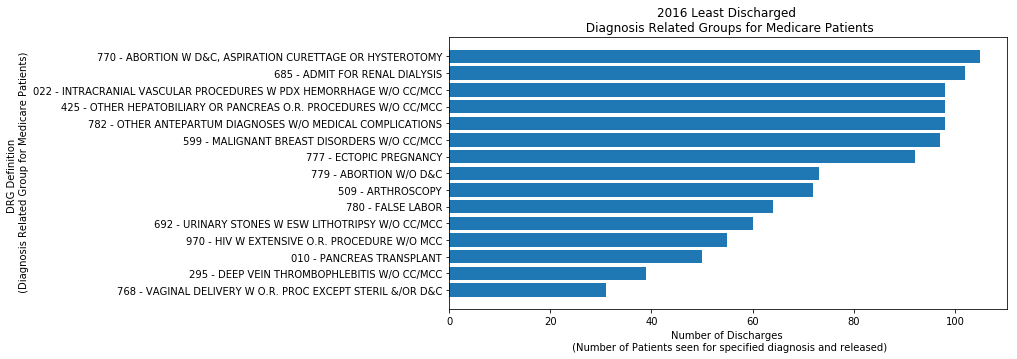

In [9]:
# plot bottom 15 diagnosis according to discharge rate
plt.figure(figsize = (10, 5))
plt.barh(least_discharges["DRG Definition"].head(15), least_discharges[" Total Discharges "].head(15));

# add labels
plt.xlabel("Number of Discharges \n (Number of Patients seen for specified diagnosis and released)")
plt.ylabel("DRG Definition \n (Diagnosis Related Group for Medicare Patients)")

plt.title("2016 Least Discharged \n Diagnosis Related Groups for Medicare Patients")

plt.savefig("Output/Images/least_discharges.png") # save image

#### Discharges v. Medicare Payments for Top Diagnosis of Medicare Patients

In [10]:
# group dataframe by diagnosis and provider state
by_drg_state = state_df_wpaid.groupby(['DRG Definition', 'Provider State']).sum()

top_diag = most_discharges.iloc[0, 0] # pull top diagnosis and assign variable to be referenced for visualization
 
# sort values for the single top diagnosis by total discharges
top_diag_bystate = by_drg_state.loc[top_diag].sort_values(by = ' Total Discharges ', ascending = False)


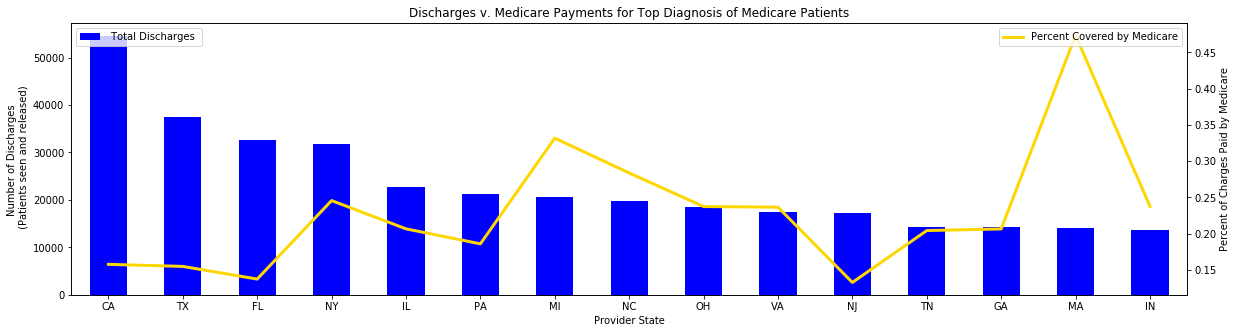

In [38]:
# set x axis and tick locations
x_axis = np.arange(top_diag_bystate.head(15).index.size)
tick_locations = [value + 0.5 for value in x_axis]

# plot graph with secondary y axis. Bar graph for top discharges and line graph for percent covered by medicare
plt.figure(figsize = (20, 5))

a1 = top_diag_bystate.head(15)[' Total Discharges '].plot(kind = 'bar', align = 'center', color = 'blue');
a2 = top_diag_bystate.head(15)['Percent Covered by Medicare'].plot(kind = 'line', 
                                                                   secondary_y = True, color = 'gold', linewidth = 3);

plt.xlim(-.5, 14.5);

# label axis
a1.set_ylabel("Number of Discharges \n (Patients seen and released)")
a2.set_ylabel("Percent of Charges Paid by Medicare")

plt.title("Discharges v. Medicare Payments for Top Diagnosis of Medicare Patients");

a1.legend(loc = "upper left")
a2.legend(loc = "upper right")

plt.savefig("Output/Images/discharge_payments.png")